3D Scene Reconstruction for a sport facility. 

Normally if there are 2D images and Point clouds data available for the same facility. I can perform 2D and Point Clouds Alignment.  

Hence as a first since there available 2D images of typical sport facility online. In order to convert the 2D image to Point clouds.    
I need to convert the 2D image to a Depth image:   

Adavantage:
1. Depth Perception: Depth information provides a sense of the relative distance of objects within a scene. By converting a 2D image to a depth image, you can enhance depth perception and enable better understanding of the spatial layout of objects in the scene.    

2. 3D Reconstruction: Depth images are commonly used in 3D reconstruction tasks to estimate the 3D structure of a scene. By converting a 2D image to a depth image, you can derive depth values for each pixel, which can be used as input for 3D reconstruction algorithms.





# Import Libraries TO CONVERT_2D Image to 3D image

In [1]:
import torch
import cv2
import numpy as np
from torchvision.transforms import functional as F
from torchvision.models import mobilenet_v2
import timm
import matplotlib.pyplot as plt

# Use the MIDAS model to convert 2D to Depth Image

In [2]:
model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)
# Load the MiDaS model
model = torch.hub.load('intel-isl/MiDaS', model_type)

# Load the model to the GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

Using cache found in /Users/pwavodij/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /Users/pwavodij/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

## Loading the 2D Image and Preprocessing

In [3]:

# Load the 2D image
image = cv2.imread('Sport.png')
# Resize the image to match the expected input size of the model
image = cv2.resize(image, (384, 384))


In [4]:

# Preprocess the image
input_image = F.to_tensor(image).unsqueeze(0).to(device)

In [5]:
# Perform depth estimation
with torch.no_grad():
    depth_map = model(input_image)

In [6]:

# Convert the depth map to a numpy array
depth_map = depth_map.squeeze().cpu().numpy()

In [7]:
# Normalize the depth values to the range [0, 255]
depth_map = (depth_map - np.min(depth_map)) / (np.max(depth_map) - np.min(depth_map))
depth_map = (depth_map * 255).astype(np.uint8)

(-0.5, 383.5, 383.5, -0.5)

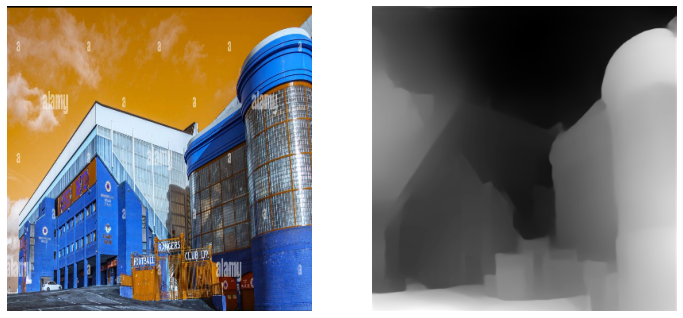

In [8]:
fig, axs=plt.subplots(1,2, figsize=(12,12))
axs[0].imshow(image)
axs[0].axis('off')
# plt.show()

axs[1].imshow(depth_map, cmap='gray')
axs[1].axis('off')
# axs[1].show()

# Save the Depth Image

In [9]:
# Display and save the depth image
cv2.imwrite('depth_image_sport.png', depth_map)


True